In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%autosave 20

Autosaving every 20 seconds


In [2]:
from model import Net

In [3]:
import torch
from torchsummary import summary
from optimizer import *
from data_loader import *
from run import *
import torch
from model import Net
from optimizer import get_optimizer,run_lrfinder
from model_fit import training,testing
import albumentations as A
from albumentations.augmentations.geometric.resize import Resize
from albumentations.pytorch.transforms import ToTensorV2
from data_loader import MNISTDataLoader
import json
from torch import nn
import plotext as plt
import torch
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR,ReduceLROnPlateau
import numpy as np
from torch_lr_finder import LRFinder
import os
import sys

# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))


In [4]:
config = load_config()

In [5]:
config['training']['epochs'] = 15

In [6]:
config['training']['epochs']

15

In [7]:
def get_model(device):
    model = Net().to(device)
    return model


def run_model(model,device,batch_size,epochs,optimizer,scheduler,best_model):
    train_losses = []
    train_accuracy = []
    test_losses =[]
    test_accuracy = []
    for EPOCHS in range(0,epochs):
        train_loss, train_acc = training(model,device,train_loader,optimizer,EPOCHS)
        train_losses.append(train_loss)
        train_accuracy.append(train_acc)

        test_loss,test_acc = testing(model,device,test_loader,EPOCHS)
        test_accuracy.append(test_acc)
        test_losses.append(test_loss)
        
        scheduler.step()
        try:
            if len(test_accuracy) > 1:
                if (EPOCHS >= 3 and 
                    max(test_accuracy[:-1]) < test_accuracy[-1] and 
                    max(test_accuracy) >= best_model):
                    
                    checkpoint = {
                        'epoch': EPOCHS + 1,
                        'valid_loss_min': test_losses[-1],
                        'state_dict': model.state_dict(),
                        'optimizer': optimizer.state_dict(),
                    }
                    
                    file_name = f"./model_folder/modelbest_{test_accuracy[-1]:.4f}_epoch_{EPOCHS}.pt"
                    torch.save(checkpoint, file_name)
                    print(f"Target Achieved: {max(test_accuracy) * 100:.2f}% Test Accuracy!!")
                else:
                    print("Conditions not met for saving the model.")
            else:
                print("Insufficient test accuracy data.")
        except Exception as e:
            print(f"Model saving failed: {e}")

        print(f"LR: {scheduler.get_lr()[0]}\n")
    return model,train_losses, train_accuracy,test_losses,test_accuracy


def load_config():
    with open('config.json', 'r') as f:
        return json.load(f)


def get_loss_function(loss_type):
    if loss_type is None:
        return nn.CrossEntropyLoss()   
    loss_types = {
        'cross_entropy': nn.CrossEntropyLoss(),
        'mse': nn.MSELoss(),
        'nll': nn.NLLLoss()
    }
    return loss_types.get(loss_type.lower(), nn.CrossEntropyLoss())

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 957/1000 [00:15<00:00, 63.40it/s]


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.74E-02


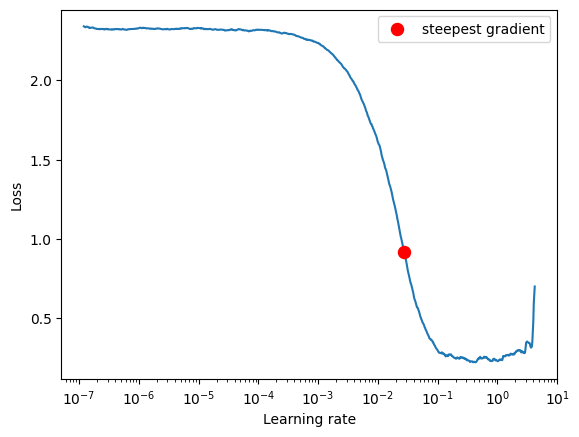

Loss: 0.22103686287496876 LR :0.027380251779278577


Train ==> Epochs: 0 Batch:  483 loss: 0.20563443005084991 Accuracy: 87.63% : 100%|██████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.61it/s]
Test ==> Epochs: 0 Batch:  80 loss: 0.0008179874941706657 Accuracy: 96.77% : 100%|████████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 59.35it/s]


Insufficient test accuracy data.
LR: 0.027380251779278577



Train ==> Epochs: 1 Batch:  483 loss: 0.10929416120052338 Accuracy: 96.58% : 100%|██████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 61.60it/s]
Test ==> Epochs: 1 Batch:  80 loss: 0.0005644781629554927 Accuracy: 97.88% : 100%|████████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 58.30it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 2 Batch:  483 loss: 0.07642707973718643 Accuracy: 97.16% : 100%|██████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 61.36it/s]
Test ==> Epochs: 2 Batch:  80 loss: 0.0005128854883834719 Accuracy: 97.91% : 100%|████████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 57.49it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 3 Batch:  483 loss: 0.037454623728990555 Accuracy: 97.39% : 100%|█████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.87it/s]
Test ==> Epochs: 3 Batch:  80 loss: 0.000509832770191133 Accuracy: 98.01% : 100%|█████████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 56.67it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 4 Batch:  483 loss: 0.1073000356554985 Accuracy: 97.56% : 100%|███████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.33it/s]
Test ==> Epochs: 4 Batch:  80 loss: 0.00044302357528358695 Accuracy: 98.25% : 100%|███████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 57.66it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 5 Batch:  483 loss: 0.015759916976094246 Accuracy: 97.78% : 100%|█████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.36it/s]
Test ==> Epochs: 5 Batch:  80 loss: 0.0004236392221413553 Accuracy: 98.33% : 100%|████████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 58.49it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 6 Batch:  483 loss: 0.052235331386327744 Accuracy: 97.79% : 100%|█████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 61.38it/s]
Test ==> Epochs: 6 Batch:  80 loss: 0.0004259990774095058 Accuracy: 98.20% : 100%|████████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 57.61it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 7 Batch:  483 loss: 0.0445740781724453 Accuracy: 97.80% : 100%|███████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.83it/s]
Test ==> Epochs: 7 Batch:  80 loss: 0.00042445806255564096 Accuracy: 98.29% : 100%|███████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 60.62it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 8 Batch:  483 loss: 0.09609514474868774 Accuracy: 97.91% : 100%|██████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.13it/s]
Test ==> Epochs: 8 Batch:  80 loss: 0.00040606864597648383 Accuracy: 98.36% : 100%|███████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 59.32it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 9 Batch:  483 loss: 0.05668123438954353 Accuracy: 97.94% : 100%|██████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 62.50it/s]
Test ==> Epochs: 9 Batch:  80 loss: 0.00036366956655401735 Accuracy: 98.64% : 100%|███████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 58.46it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 10 Batch:  483 loss: 0.0752599760890007 Accuracy: 98.01% : 100%|██████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 61.65it/s]
Test ==> Epochs: 10 Batch:  80 loss: 0.00038592721642926334 Accuracy: 98.49% : 100%|██████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 57.29it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 11 Batch:  483 loss: 0.03232988342642784 Accuracy: 98.12% : 100%|█████████████████████████████████████████████████████████████| 484/484 [00:08<00:00, 58.79it/s]
Test ==> Epochs: 11 Batch:  80 loss: 0.00038731231093406675 Accuracy: 98.59% : 100%|██████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 56.28it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 12 Batch:  483 loss: 0.11568798124790192 Accuracy: 98.13% : 100%|█████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 61.70it/s]
Test ==> Epochs: 12 Batch:  80 loss: 0.0003816935612820089 Accuracy: 98.60% : 100%|███████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 57.01it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 13 Batch:  483 loss: 0.08745071291923523 Accuracy: 98.07% : 100%|█████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 60.90it/s]
Test ==> Epochs: 13 Batch:  80 loss: 0.00042680786657147107 Accuracy: 98.40% : 100%|██████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 59.17it/s]


Conditions not met for saving the model.
LR: 0.027380251779278577



Train ==> Epochs: 14 Batch:  483 loss: 0.048578690737485886 Accuracy: 98.15% : 100%|████████████████████████████████████████████████████████████| 484/484 [00:07<00:00, 61.48it/s]
Test ==> Epochs: 14 Batch:  80 loss: 0.00033380933504085987 Accuracy: 98.68% : 100%|██████████████████████████████████████████████████████████████| 81/81 [00:01<00:00, 59.72it/s]

Conditions not met for saving the model.
LR: 0.027380251779278577

Max Train Accuracy:  0.9815
Max Test Accuracy:  0.9868


In [8]:

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Get loss function and scheduler settings from config
loss_fn = get_loss_function(config['training'].get('loss_type'))
use_scheduler = config['training'].get('use_scheduler', False)
scheduler_type = config['training'].get('scheduler_type', 'steplr')
use_scheduler = bool(use_scheduler)
best_model = config['best_model']

# Set seed from config
_ = torch.manual_seed(config['seed'])
if torch.cuda.is_available():
    _ = torch.cuda.manual_seed(config['seed'])

# Get batch size based on device
batch_size = config['training']['batch_size']
epochs = config['training']['epochs']

model = get_model(device)
data_loader = MNISTDataLoader(batch_size=batch_size)
train_loader, test_loader = data_loader.get_data_loaders()


lrs,_ = run_lrfinder(
    model, 
    device, 
    train_loader, 
    test_loader, 
    start_lr=config['training']['start_lr'],
    end_lr=config['training']['end_lr']
)
optimizer,scheduler = get_optimizer(model,scheduler = use_scheduler,\
                          scheduler_type = scheduler_type,lr = lrs[0])

model,train_losses, train_accuracy,test_losses,test_accuracy= run_model(model,device,batch_size,epochs,optimizer,scheduler,best_model)


print("Max Train Accuracy: ",max(train_accuracy))
print("Max Test Accuracy: ",max(test_accuracy))

Text(0.5, 1.0, 'Model Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Model Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

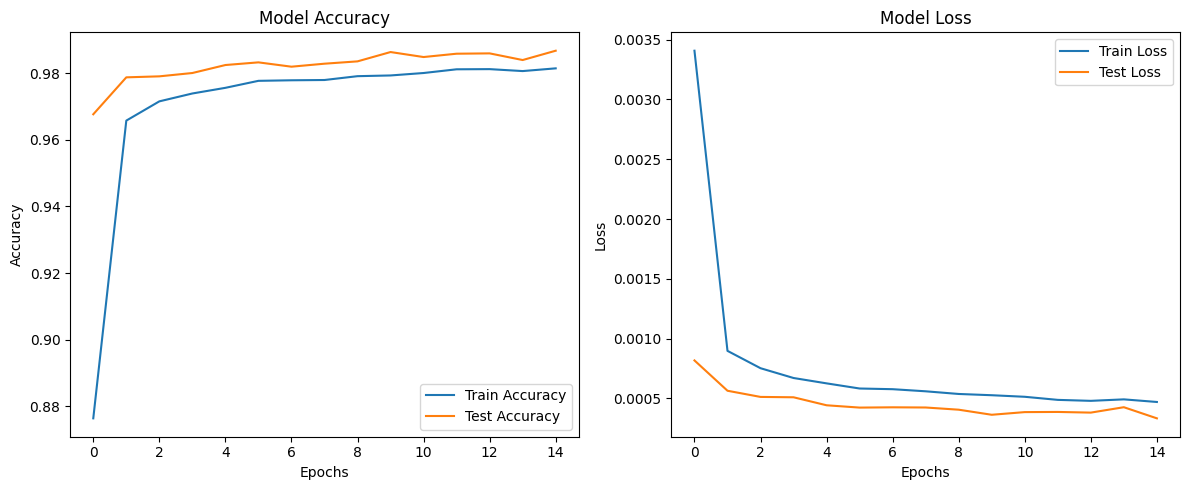

In [10]:
import matplotlib.pyplot as plt
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot accuracy on the first subplot
axes[0].plot(train_accuracy, label="Train Accuracy")
axes[0].plot(test_accuracy, label="Test Accuracy")
axes[0].set_title("Model Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plot loss on the second subplot
axes[1].plot(train_losses, label="Train Loss")
axes[1].plot(test_losses, label="Test Loss")
axes[1].set_title("Model Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [11]:
!pytest -v

============================= test session starts ==============================
platform linux -- Python 3.12.7, pytest-8.3.3, pluggy-1.5.0 -- /home/jd/miniconda3/envs/era_n/bin/python
cachedir: .pytest_cache
rootdir: /home/jd/Desktop/Mnist_ops
plugins: anyio-4.6.2.post1
collected 11 items                                                             

tests/test_model.py::test_model_param_count PASSED                       [  9%]
tests/test_model.py::test_model_output_shape PASSED                      [ 18%]
tests/test_model.py::test_cuda_available PASSED                          [ 27%]
tests/test_model.py::test_batch_size PASSED                              [ 36%]
tests/test_model.py::test_calculate_stats PASSED                         [ 45%]
tests/test_model.py::test_transformations PASSED                         [ 54%]
tests/test_model.py::test_dataloader_args PASSED                         [ 63%]
tests/test_model.py::test_data_loaders PASSED                            [ 72%]
tests/

In [12]:
!ls -R .github/

.github/:
workflows

.github/workflows:
python-app.yml
